In [1]:
# Imports
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("Hotel_Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

# Describe dataset's main statistics
print(df.describe(include="all"))

(36275, 19)
       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
count       36275  36275.000000    36275.000000          36275.000000   
unique      36275           NaN             NaN                   NaN   
top      INN00001           NaN             NaN                   NaN   
freq            1           NaN             NaN                   NaN   
mean          NaN      1.844962        0.105279              0.810724   
std           NaN      0.518715        0.402648              0.870644   
min           NaN      0.000000        0.000000              0.000000   
25%           NaN      2.000000        0.000000              0.000000   
50%           NaN      2.000000        0.000000              1.000000   
75%           NaN      2.000000        0.000000              2.000000   
max           NaN      4.000000       10.000000              7.000000   

        no_of_week_nights type_of_meal_plan  required_car_parking_space  \
count        36275.000000           

In [4]:
df.describe(include="all")

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [5]:
resultat = df.booking_status.value_counts()
print(resultat)

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


<AxesSubplot:xlabel='booking_status', ylabel='count'>

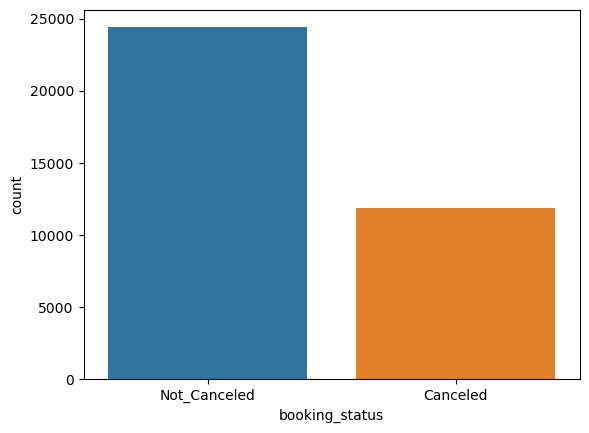

In [6]:
sns.countplot(x="booking_status", data=df)

In [7]:
resultat = df.no_of_children.value_counts()
print(resultat)

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64


In [8]:
df[df.no_of_children >= 9]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,INN06339,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled
10041,INN10042,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.00,0,Not_Canceled
10061,INN10062,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.50,1,Canceled


In [9]:
resultat = df.no_of_adults.value_counts()
print(resultat)

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64


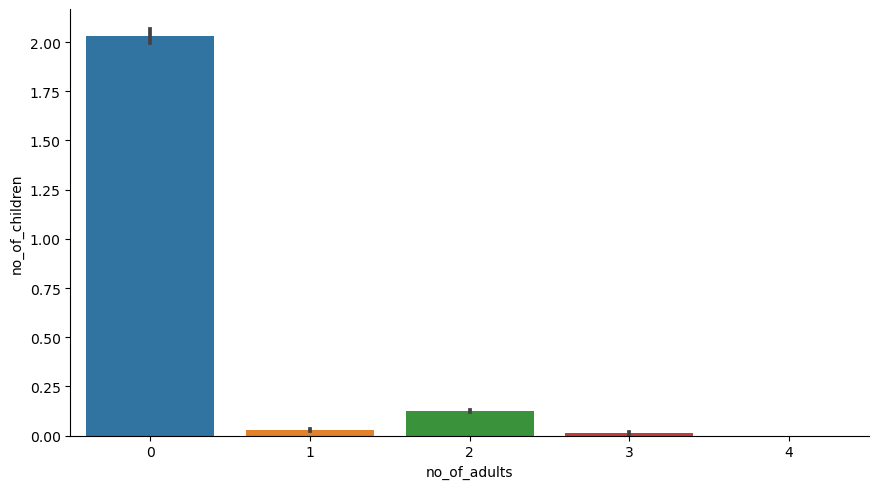

In [10]:
sns.catplot(x="no_of_adults", 
            y="no_of_children", 
            data=df.sort_values(by="Booking_ID", ascending= False),
            kind="bar",
            aspect=16/9)

In [11]:
df[df.no_of_adults == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,INN00033,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
287,INN00288,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,2018,4,24,Online,0,0,0,108.38,1,Canceled
653,INN00654,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,2018,8,19,Online,0,0,0,115.68,1,Not_Canceled
937,INN00938,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67,1,Not_Canceled
954,INN00955,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,2018,10,29,Online,0,0,0,81.50,2,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,INN34721,0,2,0,3,Meal Plan 1,0,Room_Type 2,76,2018,9,21,Online,0,0,0,127.38,3,Not_Canceled
34730,INN34731,0,2,1,1,Meal Plan 1,0,Room_Type 2,178,2018,8,27,Online,0,0,0,88.77,0,Canceled
34890,INN34891,0,2,2,2,Meal Plan 1,0,Room_Type 2,31,2018,9,16,Online,0,0,0,124.25,2,Not_Canceled
35691,INN35692,0,2,2,1,Meal Plan 1,0,Room_Type 2,75,2018,3,19,Online,0,0,0,78.00,0,Canceled


In [13]:
resultat = df.arrival_year.value_counts()
print(resultat)

2018    29761
2017     6514
Name: arrival_year, dtype: int64


In [14]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


In [15]:
# Suppression des lignes où réservation enfants seuls
# 139 lignes en tout
df.drop(df[(df['no_of_children'] >0) & (df['no_of_adults'] == 0)].index, inplace=True)

In [16]:
# Print the shape of dataset in the form of (#rows, #columns)= OK 139 lignes supprimées
print(df.shape)

(36136, 19)


In [17]:
# Suppression des lignes où nb enfants trop élevés: 9 ou 10
# 3 lignes en tout

df.drop(df[(df['no_of_children'] >= 9)].index, inplace=True)

In [18]:
# Print the shape of dataset in the form of (#rows, #columns)= OK 3 lignes supprimées
print(df.shape)

(36133, 19)


In [19]:
# suppresssion de la colonne année car seulement 2017 et 2018 donc non représentatif
del df['arrival_year']

In [61]:
print(df.shape)

(36133, 18)


In [20]:
resultat = df.booking_status.value_counts()
print(resultat)

Not_Canceled    24293
Canceled        11840
Name: booking_status, dtype: int64


In [21]:
df['booking_status_B'] = [0 if a == "Not_Canceled" else 1 for a in df['booking_status']]

In [22]:
# Vérifier qu'il y a bien 1 quand booking status Cancelled

df[df.booking_status_B == 1]
        

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_status_B
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,Canceled,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,Canceled,1
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,9,13,Online,0,0,0,115.00,1,Canceled,1
12,INN00013,2,0,2,1,Not Selected,0,Room_Type 1,30,11,26,Online,0,0,0,88.00,0,Canceled,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,7,11,Online,0,0,0,93.15,0,Canceled,1
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,11,1,Offline,0,0,0,110.00,0,Canceled,1
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,10,6,Online,0,0,0,216.00,0,Canceled,1
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,10,17,Online,0,0,0,90.95,2,Canceled,1


In [23]:
# Vérifier qu'il y a bien 0 quand nbooking status Not Cancelled

df[df.booking_status_B == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_status_B
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,Not_Canceled,0
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,10,15,Online,0,0,0,107.55,1,Not_Canceled,0
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,12,26,Online,0,0,0,105.61,1,Not_Canceled,0
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,7,6,Offline,0,0,0,96.90,1,Not_Canceled,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2,28,Online,0,0,0,1.00,0,Not_Canceled,0
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,5,30,Online,0,0,0,100.73,0,Not_Canceled,0
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,8,3,Online,0,0,0,167.80,1,Not_Canceled,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,7,1,Online,0,0,0,98.39,2,Not_Canceled,0


In [24]:
resultat = df.booking_status_B.value_counts()
print(resultat)

0    24293
1    11840
Name: booking_status_B, dtype: int64


In [25]:
del df['booking_status']

In [26]:
# Vérifier que les bonnes lignes / colonnes ont été supprimées
df.describe(include="all")

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_B
count,36133,36133.000000,36133.000000,36133.000000,36133.000000,36133,36133.000000,36133,36133.000000,36133.000000,36133.000000,36133,36133.000000,36133.000000,36133.000000,36133.000000,36133.000000,36133.000000
unique,36133,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,27695,NaN,28126,NaN,NaN,NaN,23078,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.852074,0.097113,0.810229,2.203554,NaN,0.031080,NaN,85.187612,7.424515,15.590181,NaN,0.025738,0.023441,0.154014,103.509164,0.618410,0.327678
std,NaN,0.506908,0.375780,0.870500,1.410803,NaN,0.173535,NaN,85.952775,3.068318,8.740764,NaN,0.158356,0.369052,1.757588,35.062636,0.785585,0.469373
min,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.390000,0.000000,0.000000
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.480000,0.000000,0.000000
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.120000,1.000000,1.000000


In [27]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

(36133, 18)


In [28]:
df.isnull().any()
    

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status_B                        False
dtype: bool

In [29]:
# Separate target variable Y from features X
## Choose the columns you want to have as your features
features_list = ['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','required_car_parking_space','room_type_reserved','lead_time','arrival_month','arrival_date','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

print("Splitting dataset into X and y...")
X = df.loc[:,features_list] # We add feature_list into our loc 

y = df.loc[:,"booking_status_B"] # We set "Purchased" as the target variable
print("...Done.")

Splitting dataset into X and y...
...Done.


In [30]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.") 

Splitting dataset into train set and test set...
...Done.


In [31]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  

# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [0,1,2,3,5,7,8,9,11,12,13,14,15] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [4,6,10] # Choose which column index we are going to encode
categorical_transformer = OneHotEncoder()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
28792             2               0                     0                  1   
13430             1               0                     0                  2   
9335              2               0                     0                  2   
16391             1               0                     0                  1   
33504             1               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
28792      Not Selected                           0        Room_Type 1   
13430       Meal Plan 2                           0        Room_Type 1   
9335       Not Selected                           0        Room_Type 1   
16391      Not Selected                           0        Room_Type 1   
33504       Meal Plan 1                           0        Room_Type 1   

       l

In [32]:
# Step 2 - Build a Logistic Regression

In [33]:
# Training model 
print("Training model...")
classifier = LogisticRegression(random_state = 0) # Instanciate model 
classifier.fit(X_train, y_train) # Fit model
print("...Done.")

Training model...
...Done.


/Users/virginie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

print("#### First five predictions on TRAIN set ####")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

#### First five predictions on TRAIN set ####
[0 0 0 0 0]


In [35]:
### Test pipeline ###
print("--- Test pipeline ---") 

# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")

print("#### X_test AFTER preprocessing ####")
print(X_test[0:5,:])
print()

--- Test pipeline ---
Encoding categorical features and standardizing numerical features...

...Done.
#### X_test AFTER preprocessing ####
[[ 1.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.30260322 -0.25922221
   1.37883978  1.99289058 -0.17988091 -0.9668522   1.49275837  1.41888013
  -0.16365567 -0.06406837 -0.08967707  0.29005704  0.48468211]
 [ 1.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.30260322 -0.25922221
   1.37883978 -0.85465184 -0.17988091 -0.02698316  1.16697506  0.50417946
  -0.16365567 -0.06406837 -0.08967707 -0.27665956 -0.78816436]
 [ 1.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.  

In [36]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

print("#### First five predictions on TEST set ####")
print(y_train_pred[0:5])

Predictions on test set...
...Done.

#### First five predictions on TEST set ####
[0 0 0 0 0]


In [37]:
#Step 3 - Evaluate your model

--- Assessment of performances ---


/Users/virginie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


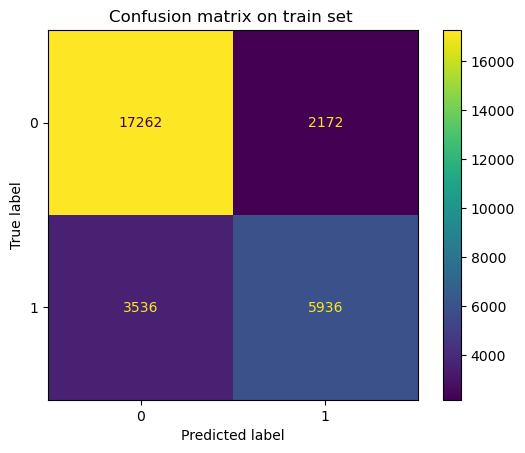

/Users/virginie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy-score on train set :  0.8025323462256971


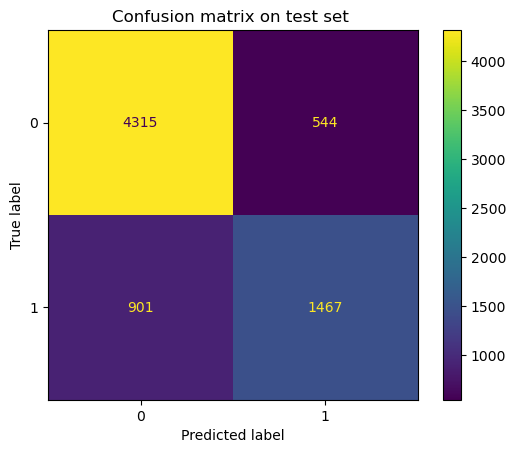

accuracy-score on test set :  0.8000553480005534


In [38]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred,target_names = ["0 = Not_Cancelled","1 = Cancelled"]))

                   precision    recall  f1-score   support

0 = Not_Cancelled       0.83      0.89      0.86      4859
    1 = Cancelled       0.73      0.62      0.67      2368

         accuracy                           0.80      7227
        macro avg       0.78      0.75      0.76      7227
     weighted avg       0.80      0.80      0.80      7227



In [40]:
# Check coefficients 

print("coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)
print()

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)
print()

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])
print()

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_

# CAREFUL HERE, we have a list of two arrays. We can use list comprehensions OR np.append() 
# General complex method
# flat_cat_features = [item for array in categorical_column_names for item in array]

# Easy but manual method
flat_cat_features = [item for array in categorical_column_names for item in array]

print("Categorical columns are: ", flat_cat_features) 
print()

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)
print()

# Append all columns 
all_column_names = np.append(flat_cat_features, numerical_column_names)
print("All column names are: ",all_column_names)
print()

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.coef_.squeeze(),# CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})

#feature_importance["coefficients"] = feature_importance["coefficients"].abs()

feature_importance = feature_importance.sort_values(by=['coefficients'], ascending=False)



feature_importance

coefficients are:  [[-0.45175533 -0.44455678  0.2252979  -0.12567305  0.43950061  0.07471058
   0.23634928  0.2032546  -0.10819772 -0.50942471 -1.13287991  1.0815298
  -1.77064715 -0.06151099 -0.91375042  0.8676915   0.04065981  0.04174509
   0.10591936  0.06324688 -0.29718958  1.39718582 -0.18462038  0.0046114
  -0.3117251   0.08036059 -0.15337778  0.70913821 -1.14487343]]
Constant is:  [-1.40832758]

All transformers are:  [('cat', OneHotEncoder(), [4, 6, 10]), ('num', StandardScaler(), [0, 1, 2, 3, 5, 7, 8, 9, 11, 12, 13, 14, 15])]

One Hot Encoder transformer is:  OneHotEncoder()

Categorical columns are:  ['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected', 'Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7', 'Aviation', 'Complementary', 'Corporate', 'Offline', 'Online']

numerical columns are:  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lea

,feature_names,coefficients
21,lead_time,1.397186
11,Aviation,1.081530
15,Online,0.867692
27,avg_price_per_room,0.709138
4,Room_Type 1,0.439501
6,Room_Type 3,0.236349
2,Meal Plan 3,0.225298
7,Room_Type 4,0.203255
18,no_of_weekend_nights,0.105919
25,no_of_previous_cancellations,0.080361


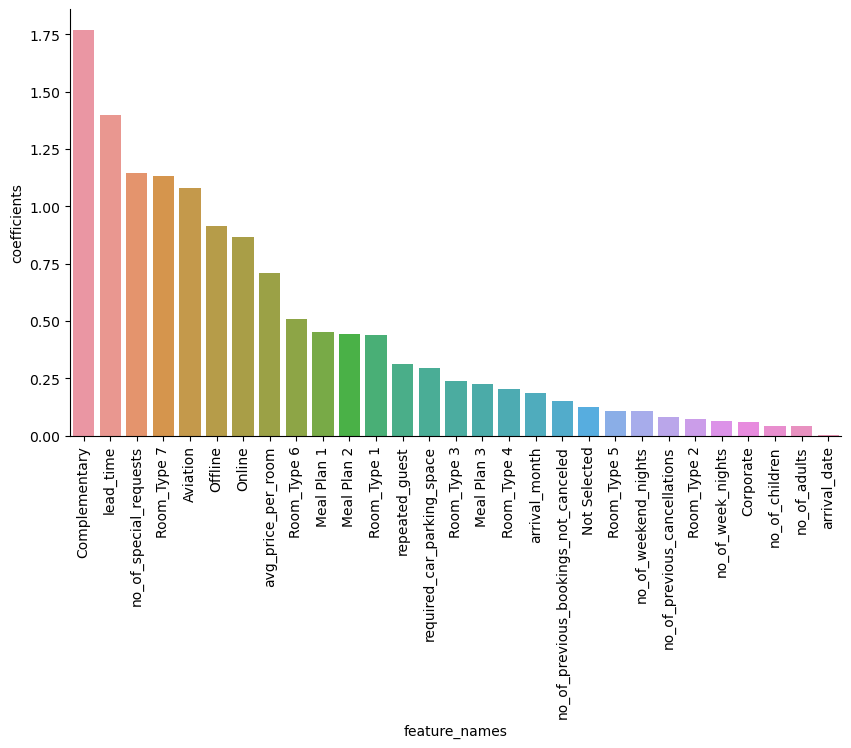

In [41]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
chart=sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9
           )

chart.ax.tick_params(axis='x', rotation=90)


In [42]:
df[df.market_segment_type == "Complementary"]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_B
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,9,10,Complementary,0,0,0,0.0,1,0
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,6,1,Complementary,1,3,5,0.0,1,0
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2,27,Complementary,0,0,0,0.0,1,0
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,8,12,Complementary,1,0,1,0.0,1,0
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,8,23,Complementary,0,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35469,INN35470,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,9,8,Complementary,0,0,0,0.0,0,0
35836,INN35837,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,1,27,Complementary,0,0,0,0.0,0,0
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,6,7,Complementary,1,4,17,0.0,1,0
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,3,21,Complementary,1,3,15,0.0,1,0


In [43]:
resultat = df.market_segment_type.value_counts()

In [44]:
print(df)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                   

In [45]:
resultat = df.booking_status_B.value_counts()
print(resultat)

0    24293
1    11840
Name: booking_status_B, dtype: int64


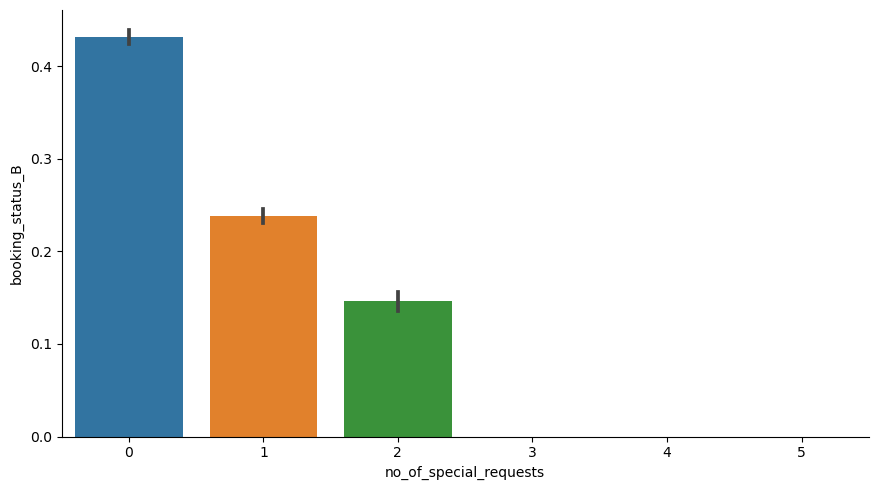

In [46]:
sns.catplot(x="no_of_special_requests", 
            y="booking_status_B", 
            data=df.sort_values(by="booking_status_B", ascending= False),
            kind="bar",
            aspect=16/9)

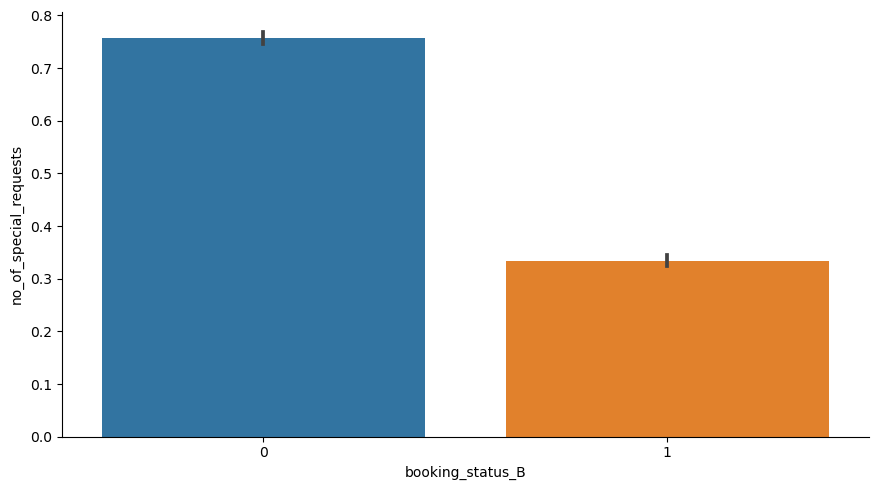

In [47]:
sns.catplot(x="booking_status_B", 
            y="no_of_special_requests", 
            data=df.sort_values(by="booking_status_B", ascending= False),
            kind="bar",
            aspect=16/9)

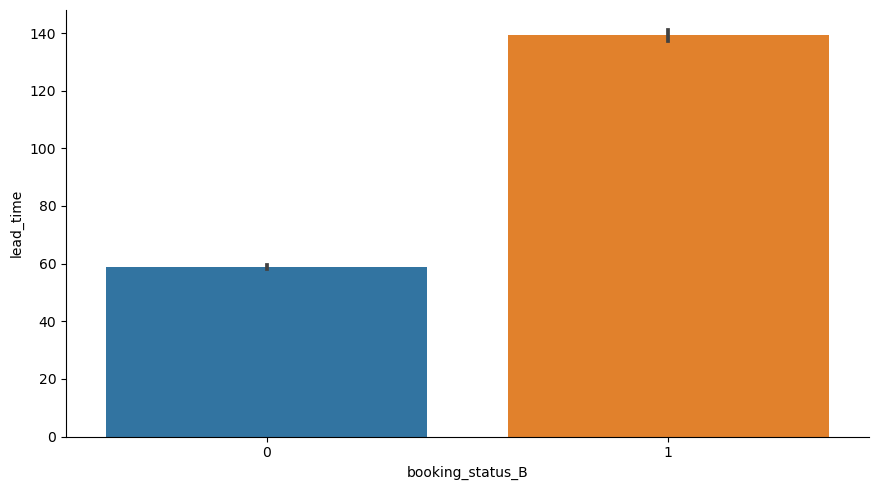

In [48]:
sns.catplot(x="booking_status_B", 
            y="lead_time", 
            data=df,
            kind="bar",
            aspect=16/9)

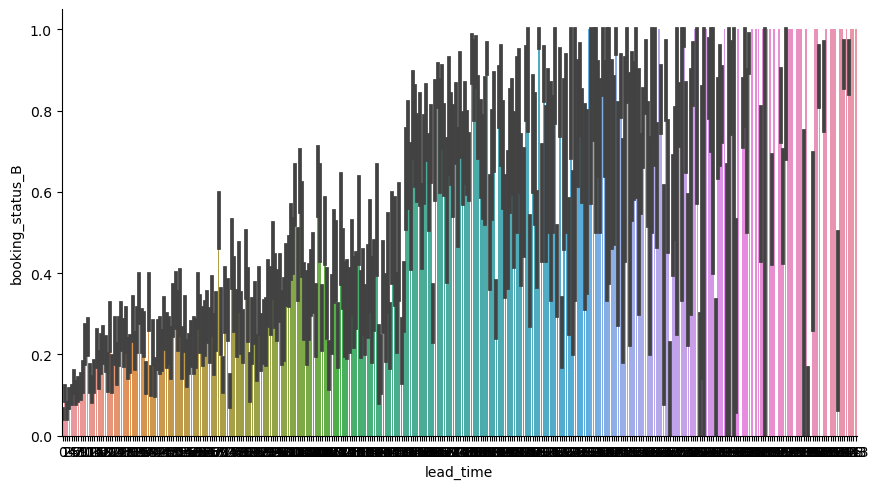

In [49]:
sns.catplot(x="lead_time", 
            y="booking_status_B", 
            data=df,
            kind="bar",
            aspect=16/9)

#sns.catplot(x="type_of_transport",y="Km_traveled", data=transports, kind="bar")

In [50]:
############RANDOM FOREST##################

In [51]:
#Step 2 - Random forests

In [52]:
# Training model
print("Training model...")
classifier = RandomForestClassifier(n_estimators = 30)
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [53]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [54]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



In [55]:
#Step 3  - Random forests - Evaluate your model

--- Assessment of performances ---


/Users/virginie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


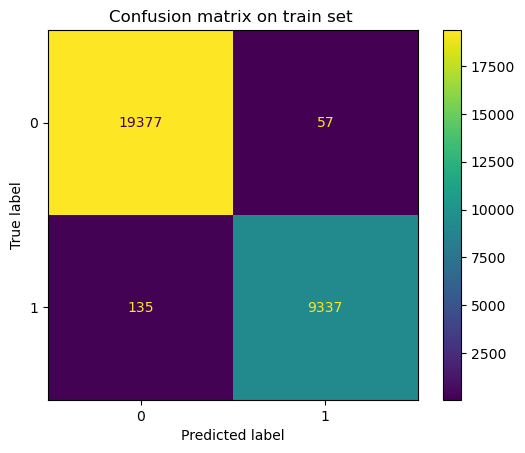

accuracy-score on train set :  0.9933577803916142


/Users/virginie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


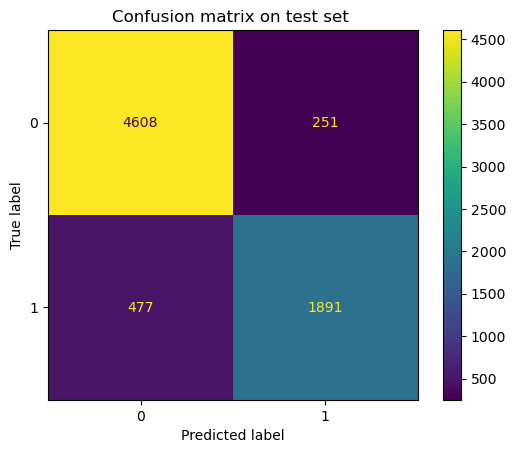

accuracy-score on test set :  0.8992666389926663


In [56]:
### Assessment of performances ###
print("--- Assessment of performances ---")


# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))


In [57]:
#Step 4 - Random forests - Feature importance

In [58]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance = feature_importance.sort_values(by=['coefficients'], ascending=False)

feature_importance

,feature_names,coefficients
21,lead_time,0.327305
27,avg_price_per_room,0.163272
28,no_of_special_requests,0.100630
23,arrival_date,0.097498
22,arrival_month,0.083514
19,no_of_week_nights,0.054940
18,no_of_weekend_nights,0.038973
15,Online,0.033190
16,no_of_adults,0.022047
14,Offline,0.017188


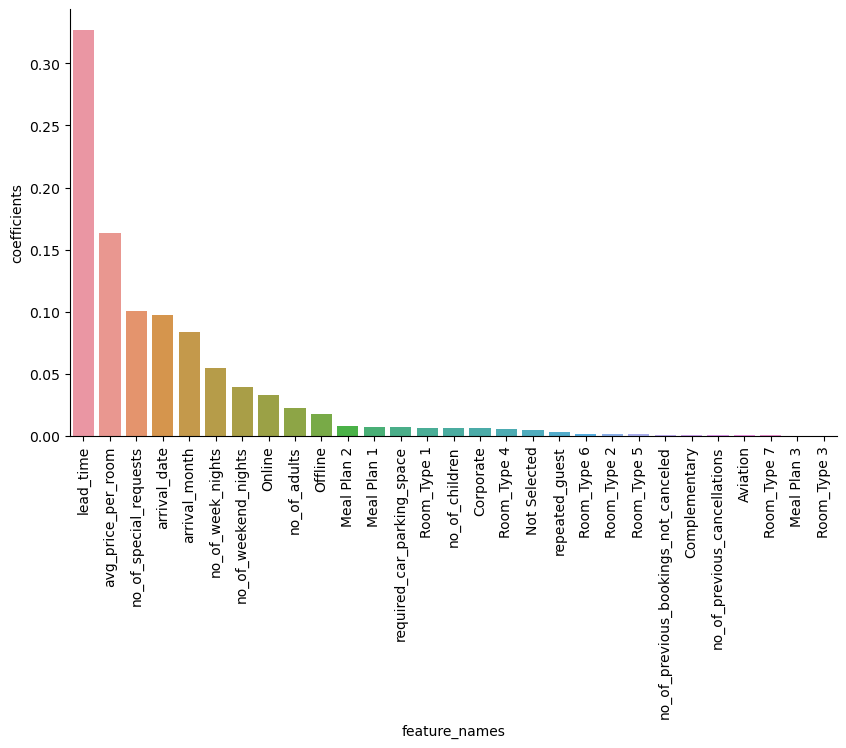

In [59]:

# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
chart=sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9
           )

chart.ax.tick_params(axis='x', rotation=90)